# Capstone 2: Biodiversity Project

# Introduction
You are a biodiversity analyst working for the National Parks Service.  You're going to help them analyze some data about species at various national parks.

Note: The data that you'll be working with for this project is *inspired* by real data, but is mostly fictional.

# Step 1
Import the modules that you'll be using in this assignment:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`

In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd

# Step 2
You have been given two CSV files. `species_info.csv` with data about different species in our National Parks, including:
- The scientific name of each species
- The common names of each species
- The species conservation status

Load the dataset and inspect it:
- Load `species_info.csv` into a DataFrame called `species`

In [2]:
species = pd.read_csv('species_info.csv')

Inspect each DataFrame using `.head()`.

In [3]:
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


# Step 3
Let's start by learning a bit more about our data.  Answer each of the following questions.

How many different species are in the `species` DataFrame?

In [4]:
number_of_species = species.scientific_name.nunique()  # 5541
number_of_species

5541

What are the different values of `category` in `species`?

In [5]:
number_per_category = species.groupby('category').scientific_name.count().reset_index()
number_per_category

,category,scientific_name
0,Amphibian,80
1,Bird,521
2,Fish,127
3,Mammal,214
4,Nonvascular Plant,333
5,Reptile,79
6,Vascular Plant,4470


In [6]:
species_category_values = species.category.unique()
species_category_values

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

What are the different values of `conservation_status`?

In [7]:
conservation_status_values = species.conservation_status.unique()
conservation_status_values

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

# Step 4
Let's start doing some analysis!

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currnetly neither in danger of extinction throughout all or a significant portion of its range

We'd like to count up how many species meet each of these criteria.  Use `groupby` to count how many `scientific_name` meet each of these criteria.

In [8]:
conservation_status_stats = species.groupby('conservation_status').scientific_name.nunique().reset_index()
conservation_status_stats

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,Species of Concern,151
3,Threatened,10


As we saw before, there are far more than 200 species in the `species` table.  Clearly, only a small number of them are categorized as needing some sort of protection.  The rest have `conservation_status` equal to `None`.  Because `groupby` does not include `None`, we will need to fill in the null values.  We can do this using `.fillna`.  We pass in however we want to fill in our `None` values as an argument.

Paste the following code and run it to see replace `None` with `No Intervention`:
```python
species.fillna('No Intervention', inplace=True)
```

In [9]:
species.fillna('No Intervention', inplace=True)

Great! Now run the same `groupby` as before to see how many species require `No Protection`.

In [10]:
conservation_status_stats = species.groupby('conservation_status').scientific_name.nunique().reset_index()
conservation_status_stats

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,No Intervention,5363
3,Species of Concern,151
4,Threatened,10


Let's use `plt.bar` to create a bar chart.  First, let's sort the columns by how many species are in each categories.  We can do this using `.sort_values`.  We use the the keyword `by` to indicate which column we want to sort by.

Paste the following code and run it to create a new DataFrame called `protection_counts`, which is sorted by `scientific_name`:
```python
protection_counts = species.groupby('conservation_status')\
    .scientific_name.count().reset_index()\
    .sort_values(by='scientific_name')
```

In [26]:
protection_counts = species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index() \
    .sort_values(by='scientific_name').reset_index(drop=True)
protection_counts

,conservation_status,scientific_name
0,In Recovery,4
1,Threatened,10
2,Endangered,15
3,Species of Concern,151
4,No Intervention,5363


Now let's create a bar chart!
1. Start by creating a wide figure with `figsize=(10, 4)`
1. Start by creating an axes object called `ax` using `plt.subplot`.
2. Create a bar chart whose heights are equal to `scientific_name` column of `protection_counts`.
3. Create an x-tick for each of the bars.
4. Label each x-tick with the label from `conservation_status` in `protection_counts`
5. Label the y-axis `Number of Species`
6. Title the graph `Conservation Status by Species`
7. Plot the grap using `plt.show()`

Text(0.5,1,'Conservation Status by Species')

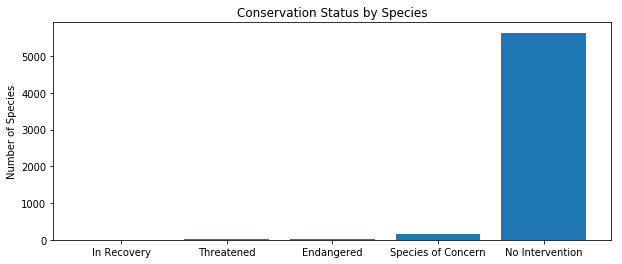

In [12]:
plt.close('all')
plt.figure(figsize=(10,4))
ax = plt.subplot()
plt.bar(range(len(protection_counts['scientific_name'])), protection_counts['scientific_name'])

xticks = range(len(protection_counts))
ax.set_xticks(xticks)

xticklabels = protection_counts.conservation_status.tolist()
ax.set_xticklabels(xticklabels)

ax.set_ylabel('Number of Species')

ax.set_title('Conservation Status by Species')

Text(0.5,1,'Conservation Status by Species')

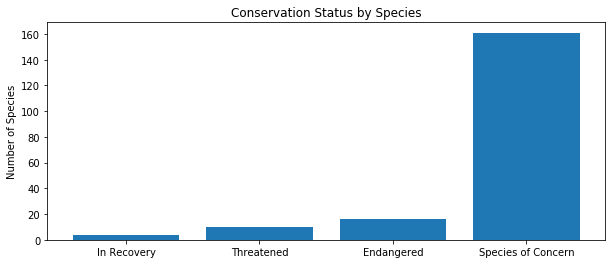

In [13]:
protection_counts_2 = protection_counts[0:4]
protection_counts_2

plt.close('all')
plt.figure(figsize=(10,4))
ax = plt.subplot()
plt.bar(range(len(protection_counts_2['scientific_name'])), protection_counts_2['scientific_name'])

xticks = range(len(protection_counts_2))
ax.set_xticks(xticks)

xticklabels = protection_counts_2.conservation_status.tolist()
ax.set_xticklabels(xticklabels)

ax.set_ylabel('Number of Species')

ax.set_title('Conservation Status by Species')

# Step 4
Are certain types of species more likely to be endangered?

Let's create a new column in `species` called `is_protected`, which is `True` if `conservation_status` is not equal to `No Intervention`, and `False` otherwise.

In [27]:
species['is_protected'] = species.conservation_status.apply(lambda x: False \
                                                           if x == 'No Intervention' \
                                                           else True)
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


Let's group by *both* `category` and `is_protected`.  Save your results to `category_counts`.

In [15]:
category_counts = species.groupby(['category', 'is_protected'])['scientific_name'].nunique().reset_index()

Examine `category_count` using `head()`.

In [16]:
category_counts.head(10)

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115
5,Fish,True,11
6,Mammal,False,146
7,Mammal,True,30
8,Nonvascular Plant,False,328
9,Nonvascular Plant,True,5


It's going to be easier to view this data if we pivot it.  Using `pivot`, rearange `category_counts` so that:
- `columns` is `conservation_status`
- `index` is `category`
- `values` is `scientific_name`

Save your pivoted data to `category_pivot`. Remember to `reset_index()` at the end.

In [17]:
category_pivot = category_counts.pivot(
    columns='is_protected',
    index='category',
    values='scientific_name').reset_index()

Examine `category_pivot`.

In [18]:
category_pivot

is_protected,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Use the `.columns` property to  rename the categories `True` and `False` to something more description:
- Leave `category` as `category`
- Rename `False` to `not_protected`
- Rename `True` to `protected`

In [19]:
category_pivot.columns = ['category', 'not_protected', 'protected']
category_pivot

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Let's create a new column of `category_pivot` called `percent_protected`, which is equal to `protected` (the number of species that are protected) divided by `protected` plus `not_protected` (the total number of species).

In [20]:
category_pivot['percent_protected'] = 100.0*category_pivot.protected/(category_pivot.protected\
                                                                      + category_pivot.not_protected)

Examine `category_pivot`.

In [21]:
category_pivot

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [22]:
percents = category_pivot[['category', 'percent_protected']].sort_values(by='percent_protected').reset_index(drop=True)
percent_list = percents.percent_protected.tolist()
labels = percents.category.tolist()
percents

,category,percent_protected
0,Vascular Plant,1.079305
1,Nonvascular Plant,1.501502
2,Reptile,6.410256
3,Fish,8.730159
4,Amphibian,8.860759
5,Bird,15.368852
6,Mammal,17.045455


Text(0.5,1,'Percentage of Protected Species per Category')

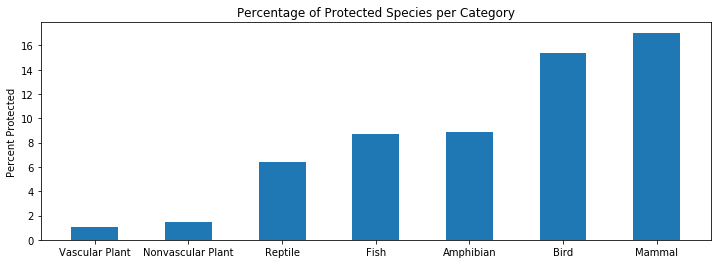

In [23]:

plt.close('all')
plt.figure(figsize=(12,4))
ax = plt.subplot()
xticks = [x*2 for x in range(len(percent_list))]

plt.bar(xticks, percent_list, width=1)


ax.set_xticks(xticks)

ax.set_xticklabels(labels)

ax.set_ylabel('Percent Protected')

ax.set_title('Percentage of Protected Species per Category')

It looks like species in category `Mammal` are more likely to be endangered than species in `Bird`.  We're going to do a significance test to see if this statement is true.  Before you do the significance test, consider the following questions:
- Is the data numerical or categorical?
- How many pieces of data are you comparing?

Based on those answers, you should choose to do a *chi squared test*.  In order to run a chi squared test, we'll need to create a contingency table.  Our contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

Create a table called `contingency` and fill it in with the correct numbers

In [34]:
contingency = [[30, 146], [75, 413]]

In order to perform our chi square test, we'll need to import the correct function from scipy.  Past the following code and run it:
```py
from scipy.stats import chi2_contingency
```

In [28]:
from scipy.stats import chi2_contingency

Now run `chi2_contingency` with `contingency`.

In [29]:
chi2, pval, dof, expected = chi2_contingency(contingency)
pval

0.6875948096661336

It looks like this difference isn't significant!

Let's test another.  Is the difference between `Reptile` and `Mammal` significant?

In [30]:
contingency2 = [[30, 146], [5, 73]]
chi2, pval, dof, expected = chi2_contingency(contingency2)
pval

0.03835559022969898

Yes! It looks like there is a significant difference between `Reptile` and `Mammal`!

# Step 5

Conservationists have been recording sightings of different species at several national parks for the past 7 days.  They've saved sent you their observations in a file called `observations.csv`.  Load `observations.csv` into a variable called `observations`, then use `head` to view the data.

In [ ]:
observations = pd.read_csv('observations.csv')
observations.head()

Some scientists are studying the number of sheep sightings at different national parks.  There are several different scientific names for different types of sheep.  We'd like to know which rows of `species` are referring to sheep.  Notice that the following code will tell us whether or not a word occurs in a string:

In [ ]:
# Does "Sheep" occur in this string?
str1 = 'This string contains Sheep'
'Sheep' in str1

In [ ]:
# Does "Sheep" occur in this string?
str2 = 'This string contains Cows'
'Sheep' in str2

Use `apply` and a `lambda` function to create a new column in `species` called `is_sheep` which is `True` if the `common_names` contains `'Sheep'`, and `False` otherwise.

In [ ]:
species['is_sheep'] = species.common_names.apply(lambda x: True if 'Sheep' in x else False)
species.head()

Select the rows of `species` where `is_sheep` is `True` and examine the results.

In [ ]:
species[species.is_sheep == True]

Many of the results are actually plants.  Select the rows of `species` where `is_sheep` is `True` and `category` is `Mammal`.  Save the results to the variable `sheep_species`.

In [ ]:
sheep_species = species[(species.is_sheep == True) & (species.category == 'Mammal')]
sheep_species

Now merge `sheep_species` with `observations` to get a DataFrame with observations of sheep.  Save this DataFrame as `sheep_observations`.

In [ ]:
sheep_observations = sheep_species.merge(observations)
sheep_observations

How many total sheep observations (across all three species) were made at each national park?  Use `groupby` to get the `sum` of `observations` for each `park_name`.  Save your answer to `obs_by_park`.

This is the total number of sheep observed in each park over the past 7 days.

In [ ]:
obs_by_park = sheep_observations.groupby('park_name')['observations'].sum().reset_index()
obs_by_park

Create a bar chart showing the different number of observations per week at each park.

1. Start by creating a wide figure with `figsize=(16, 4)`
1. Start by creating an axes object called `ax` using `plt.subplot`.
2. Create a bar chart whose heights are equal to `observations` column of `obs_by_park`.
3. Create an x-tick for each of the bars.
4. Label each x-tick with the label from `park_name` in `obs_by_park`
5. Label the y-axis `Number of Observations`
6. Title the graph `Observations of Sheep per Week`
7. Plot the grap using `plt.show()`

In [ ]:
plt.figure(figsize=(16,4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park)), obs_by_park.observations.tolist())
ax.set_xticks(range(len(obs_by_park)))
ax.set_xticklabels(obs_by_park.park_name.tolist())
ax.set_ylabel('Number of Observations')
ax.set_title('Observations of Sheep per Week')
plt.show()


Our scientists know that 15% of sheep at Bryce National Park have foot and mouth disease.  Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park.  The scientists want to test whether or not this program is working.  They want to be able to detect reductions of at least 5 percentage point.  For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

Use the sample size calculator at <a href="https://www.optimizely.com/sample-size-calculator/">Optimizely</a> to calculate the number of sheep that they would need to observe from each park.  Use the default level of significance (90%).

Remember that "Minimum Detectable Effect" is a percent of the baseline.

In [ ]:
baseline_conversion_rate = 15
minimal_detectable_effect = 100.0*(15-10)/15 #33%
signficance_level = 90
sample_size = 520

minimal_detectable_effect

How many weeks would you need to observe sheep at Bryce National Park in order to observe enough sheep?  How many weeks would you need to observe at Yellowstone National Park to observe enough sheep?

In [ ]:
bryce_weeks = 510/250
yellowstone_weeks = 510/507